In [ ]:
import os
import sys

import pandas as pd 
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import recall_score, f1_score, precision_score, precision_recall_curve, roc_auc_score, auc, roc_curve

import shap

In [ ]:
df = pd.read_csv('./final_data_2.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'STABLE_WORK',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'STATUS', 'FEMALE', 'MALE', 'Commercial associate', 'Pensioner',
       'State servant', 'Student', 'Working', 'Civil marriage', 'Married',
       'Separated', 'Single / not married', 'Widow', 'Co-op apartment',
       'House / apartment', 'Municipal apartment', 'Office apartment',
       'Rented apartment', 'With parents', 'AGE'],
      dtype='object')

In [ ]:
target = 'STATUS'
features = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
          'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'STABLE_WORK',
          'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
          'FEMALE', 'MALE', 'Commercial associate', 'Pensioner',
          'State servant', 'Student', 'Working', 'Civil marriage', 'Married',
          'Separated', 'Single / not married', 'Widow', 'Co-op apartment',
          'House / apartment', 'Municipal apartment', 'Office apartment',
          'Rented apartment', 'With parents', 'AGE']

In [ ]:
x = df[features].to_numpy()
y = df[target].to_numpy()

In [ ]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
x_norm.shape

(9579, 28)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7663, 28), (1916, 28), (7663,), (1916,))

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_bal, y_train_bal = oversample.fit_resample(x_train, y_train)
x_test_bal, y_test_bal = oversample.fit_resample(x_test, y_test)

In [ ]:
print((y_train_bal == 0).sum())
print((y_train_bal == 1).sum())

7306
7306


####Логистическая регрессия + GridSearch

In [ ]:
from sklearn.linear_model import LogisticRegression
grid = {
    "penalty": ['l1', 'l2'],
    "C": [0.001, 0.01, 0.1, 1],
    "class_weight": ["balanced", None]
#     "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

logreg = LogisticRegression()

logreg_gs = GridSearchCV(estimator=logreg, 
                  param_grid=grid,
                  cv=5, 
                  scoring="f1",
                  verbose=4)

logreg_gs.fit(x_train_bal, y_train_bal)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.001, class_weight=balanced, penalty=l1 ......................
[CV]  C=0.001, class_weight=balanced, penalty=l1, score=0.000, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l1 ......................
[CV]  C=0.001, class_weight=balanced, penalty=l1, score=0.000, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l1 ......................
[CV]  C=0.001, class_weight=balanced, penalty=l1, score=0.000, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l1 ......................
[CV]  C=0.001, class_weight=balanced, penalty=l1, score=0.000, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l1 ......................
[CV]  C=0.001, class_weight=balanced, penalty=l1, score=0.000, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2 ......................
[CV]  C=0.001, class_weight=balanced, penalty=l2, score=0.568, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2 ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted sampl

[CV]  C=0.001, class_weight=None, penalty=l2, score=0.539, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l2 ..........................
[CV]  C=0.001, class_weight=None, penalty=l2, score=0.550, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l2 ..........................
[CV]  C=0.001, class_weight=None, penalty=l2, score=0.547, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1 .......................
[CV]  C=0.01, class_weight=balanced, penalty=l1, score=0.547, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1 .......................
[CV]  C=0.01, class_weight=balanced, penalty=l1, score=0.551, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1 .......................
[CV]  C=0.01, class_weight=balanced, penalty=l1, score=0.548, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1 .......................
[CV]  C=0.01, class_weight=balanced, penalty=l1, score=0.558, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1 ....

/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

[CV]  C=0.01, class_weight=balanced, penalty=l2, score=0.546, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l1 ...........................
[CV]  C=0.01, class_weight=None, penalty=l1, score=0.547, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l1 ...........................
[CV]  C=0.01, class_weight=None, penalty=l1, score=0.551, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l1 ...........................
[CV]  C=0.01, class_weight=None, penalty=l1, score=0.548, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l1 ...........................
[CV]  C=0.01, class_weight=None, penalty=l1, score=0.558, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l1 ...........................
[CV]  C=0.01, class_weight=None, penalty=l1, score=0.545, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2 ...........................
[CV]  C=0.01, class_weight=None, penalty=l2, score=0.559, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2 .......................

/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

[CV]  C=0.01, class_weight=None, penalty=l2, score=0.546, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1 ........................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.1, class_weight=balanced, penalty=l1, score=0.555, total=   0.4s
[CV] C=0.1, class_weight=balanced, penalty=l1 ........................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.1, class_weight=balanced, penalty=l1, score=0.534, total=   0.5s
[CV] C=0.1, class_weight=balanced, penalty=l1 ........................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.1, class_weight=balanced, penalty=l1, score=0.529, total=   0.5s
[CV] C=0.1, class_weight=balanced, penalty=l1 ........................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.1, class_weight=balanced, penalty=l1, score=0.542, total=   0.4s
[CV] C=0.1, class_weight=balanced, penalty=l1 ........................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.1, class_weight=balanced, penalty=l1, score=0.532, total=   0.5s
[CV] C=0.1, class_weight=balanced, penalty=l2 ........................
[CV]  C=0.1, class_weight=balanced, penalty=l2, score=0.557, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2 ........................
[CV]  C=0.1, class_weight=balanced, penalty=l2, score=0.535, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2 ........................
[CV]  C=0.1, class_weight=balanced, penalty=l2, score=0.527, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2 ........................
[CV]  C=0.1, class_weight=balanced, penalty=l2, score=0.540, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2 ........................
[CV]  C=0.1, class_weight=balanced, penalty=l2, score=0.533, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l1 ............................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

[CV]  C=0.1, class_weight=None, penalty=l1, score=0.555, total=   0.4s
[CV] C=0.1, class_weight=None, penalty=l1 ............................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.1, class_weight=None, penalty=l1, score=0.534, total=   0.5s
[CV] C=0.1, class_weight=None, penalty=l1 ............................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.1, class_weight=None, penalty=l1, score=0.529, total=   0.5s
[CV] C=0.1, class_weight=None, penalty=l1 ............................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.1, class_weight=None, penalty=l1, score=0.542, total=   0.4s
[CV] C=0.1, class_weight=None, penalty=l1 ............................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.1, class_weight=None, penalty=l1, score=0.531, total=   0.5s
[CV] C=0.1, class_weight=None, penalty=l2 ............................
[CV]  C=0.1, class_weight=None, penalty=l2, score=0.557, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l2 ............................
[CV]  C=0.1, class_weight=None, penalty=l2, score=0.535, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l2 ............................
[CV]  C=0.1, class_weight=None, penalty=l2, score=0.527, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l2 ............................
[CV]  C=0.1, class_weight=None, penalty=l2, score=0.540, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l2 ............................
[CV]  C=0.1, class_weight=None, penalty=l2, score=0.533, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l1 ..........................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

[CV]  C=1, class_weight=balanced, penalty=l1, score=0.550, total=   7.4s
[CV] C=1, class_weight=balanced, penalty=l1 ..........................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1, class_weight=balanced, penalty=l1, score=0.530, total=   5.5s
[CV] C=1, class_weight=balanced, penalty=l1 ..........................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1, class_weight=balanced, penalty=l1, score=0.522, total=   6.6s
[CV] C=1, class_weight=balanced, penalty=l1 ..........................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1, class_weight=balanced, penalty=l1, score=0.535, total=   7.5s
[CV] C=1, class_weight=balanced, penalty=l1 ..........................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1, class_weight=balanced, penalty=l1, score=0.531, total=   6.2s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.552, total=   0.1s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.531, total=   0.1s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.526, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1, class_weight=balanced, penalty=l2, score=0.535, total=   0.1s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.533, total=   0.0s
[CV] C=1, class_weight=None, penalty=l1 ..............................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .. C=1, class_weight=None, penalty=l1, score=0.550, total=   6.5s
[CV] C=1, class_weight=None, penalty=l1 ..............................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .. C=1, class_weight=None, penalty=l1, score=0.530, total=   5.6s
[CV] C=1, class_weight=None, penalty=l1 ..............................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .. C=1, class_weight=None, penalty=l1, score=0.522, total=   6.4s
[CV] C=1, class_weight=None, penalty=l1 ..............................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .. C=1, class_weight=None, penalty=l1, score=0.535, total=   6.8s
[CV] C=1, class_weight=None, penalty=l1 ..............................
[CV] .. C=1, class_weight=None, penalty=l1, score=0.531, total=   6.7s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.552, total=   0.1s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.531, total=   0.1s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.526, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.535, total=   0.1s
[CV] C=1, class_weight=None, penalty=l2 ..............................


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .. C=1, class_weight=None, penalty=l2, score=0.533, total=   0.0s


/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.2min finished
/home/yana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=4)

In [ ]:
print(f" Best params are {logreg_gs.best_params_}")
      
print(f" F1 score on test is {round(f1_score(y_test_bal, logreg_gs.best_estimator_.predict(x_test_bal))*100, 2)}")
print(f" F1 score on train is {round(f1_score(y_train_bal, logreg_gs.best_estimator_.predict(x_train_bal))*100, 2)}")
print(f" Roc-auc score on test is {round(roc_auc_score(y_test_bal, logreg_gs.best_estimator_.predict(x_test_bal))*100, 2)}")
print(f" Roc-auc score on train is {round(roc_auc_score(y_train_bal, logreg_gs.best_estimator_.predict(x_train_bal))*100, 2)}")


 Best params are {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2'}
 F1 score on test is 48.04
 F1 score on train is 55.31
 Roc-auc score on test is 49.78
 Roc-auc score on train is 55.34


Деревья Решений + Grid Search

In [ ]:
# Grid search + cross validation

clf = DecisionTreeClassifier()

# будут рассмотрены все возможные комбинаци этих значений
param_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 5, 7],
    'max_features': [0.5, 'sqrt', None]
}

dt = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='f1',
    cv=5, 
    verbose=4
)
dt.fit(x_train_bal, y_train_bal)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=2, max_features=0.5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=0.5, min_samples_split=2, score=0.539, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=0.5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=0.5, min_samples_split=2, score=0.326, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=0.5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=0.5, min_samples_split=2, score=0.396, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=0.5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=0.5, min_samples_split=2, score=0.630, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=0.5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=0.5, min_samples_split=2, score=0.328, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=0.5, min_samples_spli

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_split=5, score=0.382, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_split=5, score=0.396, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_split=5, score=0.391, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_split=5, score=0.369, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_split=7 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_split=7, score=0.300, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_split=7 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_split=7, score=0.382, total=   0.0s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=3, max_features=None, min_samples_split=7, score=0.513, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=None, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, max_features=None, min_samples_split=7, score=0.641, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=None, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, max_features=None, min_samples_split=7, score=0.648, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=None, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, max_features=None, min_samples_split=7, score=0.518, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=0.5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_features=0.5, min_samples_split=2, score=0.469, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=0.5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_features=0.5, min_samples_split=2, score=0.708, total=   0.0s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=10, max_features=0.5, min_samples_split=2, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=0.5, min_samples_split=5 
[CV]  criterion=gini, max_depth=10, max_features=0.5, min_samples_split=5, score=0.730, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=0.5, min_samples_split=5 
[CV]  criterion=gini, max_depth=10, max_features=0.5, min_samples_split=5, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=0.5, min_samples_split=5 
[CV]  criterion=gini, max_depth=10, max_features=0.5, min_samples_split=5, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=0.5, min_samples_split=5 
[CV]  criterion=gini, max_depth=10, max_features=0.5, min_samples_split=5, score=0.822, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=0.5, min_samples_split=5 
[CV]  criterion=gini, max_depth=10, max_features=0.5, min_samples_split=5, score=0.845, total=   0.0s
[CV] criterion=gin

[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=7, score=0.565, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=7 
[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=7, score=0.682, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_split=2, score=0.300, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_split=2, score=0.382, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_split=2, score=0.396, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_split=2, score=0.391,

[CV]  criterion=entropy, max_depth=3, max_features=None, min_samples_split=2, score=0.518, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=None, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, max_features=None, min_samples_split=2, score=0.648, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=None, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, max_features=None, min_samples_split=2, score=0.518, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=None, min_samples_split=5 
[CV]  criterion=entropy, max_depth=3, max_features=None, min_samples_split=5, score=0.409, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=None, min_samples_split=5 
[CV]  criterion=entropy, max_depth=3, max_features=None, min_samples_split=5, score=0.513, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=None, min_samples_split=5 
[CV]  criterion=entropy, max_depth=3, max_features=None, min_samples_split=5, score=0.518,

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_split=5, score=0.642, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_split=5 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_split=5, score=0.703, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_split=5 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_split=5, score=0.635, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_split=7, score=0.513, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_split=7, score=0.635, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_split=7, score=0.642,

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_split=5, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_split=5, score=0.798, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_split=7, score=0.697, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_split=7, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_split=7, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_split=7, s

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    4.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                        

In [ ]:
print(f" Best params are {dt.best_params_}")
      
print(f" F1 score on test is {round(f1_score(y_test_bal, dt.best_estimator_.predict(x_test_bal))*100, 2)}")
print(f" F1 score on train is {round(f1_score(y_train_bal, dt.best_estimator_.predict(x_train_bal))*100, 2)}")
print(f" Roc-auc score on test is {round(roc_auc_score(y_test_bal, dt.best_estimator_.predict(x_test_bal))*100, 2)}")
print(f" Roc-auc score on train is {round(roc_auc_score(y_train_bal, dt.best_estimator_.predict(x_train_bal))*100, 2)}")


 Best params are {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5}
 F1 score on test is 78.26
 F1 score on train is 80.95
 Roc-auc score on test is 80.58
 Roc-auc score on train is 83.04


Random Forest + GridSearch

In [ ]:
#  Grid search + cross validation
%time
rfc = RandomForestClassifier()
param_grid = {       
     'n_estimators' : [80, 160, 500, 1000],
     'criterion' : ['gini', 'entropy'],
     'max_depth' : [3, 5, 10],
     'min_samples_split' : [2, 3, 7]   
    }

rfc_gs = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    scoring=['f1'], 
    refit='f1',
    cv=5,
    verbose=4, 
    n_jobs=1,
)
rfc_gs.fit(x_train_bal, y_train_bal)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=80 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=80, f1=0.716, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=80 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=80, f1=0.791, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=80, f1=0.784, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=80 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=80, f1=0.793, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=80 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=80, f1=0.775, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=160 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=160, f1=0.704, total=   0.4s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=160 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=160, f1=0.778, total=   0.4s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=160 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=160, f1=0.771, total=   0.4s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=160 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=160, f1=0.798, total=   0.4s
[CV] criterion=gini, max_depth=3, min_samples_spli

[CV]  criterion=gini, max_depth=3, min_samples_split=7, n_estimators=500, f1=0.779, total=   1.2s
[CV] criterion=gini, max_depth=3, min_samples_split=7, n_estimators=500 
[CV]  criterion=gini, max_depth=3, min_samples_split=7, n_estimators=500, f1=0.776, total=   1.2s
[CV] criterion=gini, max_depth=3, min_samples_split=7, n_estimators=500 
[CV]  criterion=gini, max_depth=3, min_samples_split=7, n_estimators=500, f1=0.802, total=   1.2s
[CV] criterion=gini, max_depth=3, min_samples_split=7, n_estimators=500 
[CV]  criterion=gini, max_depth=3, min_samples_split=7, n_estimators=500, f1=0.774, total=   1.2s
[CV] criterion=gini, max_depth=3, min_samples_split=7, n_estimators=1000 
[CV]  criterion=gini, max_depth=3, min_samples_split=7, n_estimators=1000, f1=0.703, total=   2.4s
[CV] criterion=gini, max_depth=3, min_samples_split=7, n_estimators=1000 
[CV]  criterion=gini, max_depth=3, min_samples_split=7, n_estimators=1000, f1=0.798, total=   2.4s
[CV] criterion=gini, max_depth=3, min_sampl

[CV]  criterion=gini, max_depth=5, min_samples_split=3, n_estimators=1000, f1=0.839, total=   3.2s
[CV] criterion=gini, max_depth=5, min_samples_split=7, n_estimators=80 
[CV]  criterion=gini, max_depth=5, min_samples_split=7, n_estimators=80, f1=0.733, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_split=7, n_estimators=80 
[CV]  criterion=gini, max_depth=5, min_samples_split=7, n_estimators=80, f1=0.838, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_split=7, n_estimators=80 
[CV]  criterion=gini, max_depth=5, min_samples_split=7, n_estimators=80, f1=0.857, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_split=7, n_estimators=80 
[CV]  criterion=gini, max_depth=5, min_samples_split=7, n_estimators=80, f1=0.851, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_split=7, n_estimators=80 
[CV]  criterion=gini, max_depth=5, min_samples_split=7, n_estimators=80, f1=0.821, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_split=7, n

[CV]  criterion=gini, max_depth=10, min_samples_split=3, n_estimators=160, f1=0.939, total=   0.8s
[CV] criterion=gini, max_depth=10, min_samples_split=3, n_estimators=160 
[CV]  criterion=gini, max_depth=10, min_samples_split=3, n_estimators=160, f1=0.953, total=   0.8s
[CV] criterion=gini, max_depth=10, min_samples_split=3, n_estimators=160 
[CV]  criterion=gini, max_depth=10, min_samples_split=3, n_estimators=160, f1=0.937, total=   0.8s
[CV] criterion=gini, max_depth=10, min_samples_split=3, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_split=3, n_estimators=500, f1=0.839, total=   2.5s
[CV] criterion=gini, max_depth=10, min_samples_split=3, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_split=3, n_estimators=500, f1=0.943, total=   2.5s
[CV] criterion=gini, max_depth=10, min_samples_split=3, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_split=3, n_estimators=500, f1=0.939, total=   2.5s
[CV] criterion=gini, max_depth=10, m

[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=1000, f1=0.698, total=   2.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=1000, f1=0.780, total=   2.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=1000, f1=0.775, total=   2.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=1000, f1=0.789, total=   2.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=1000, f1=0.782, total=   2.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=80 
[CV]  criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=80, f1=0.689, total=   0.2s
[CV] cr

[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=80, f1=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=80 
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=80, f1=0.850, total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=80 
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=80, f1=0.822, total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=160 
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=160, f1=0.740, total=   0.6s
[CV] criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=160 
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=160, f1=0.844, total=   0.6s
[CV] criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=160 
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=160, f1=0.840, total=   0.6s
[CV] criterion=entr

[CV]  criterion=entropy, max_depth=5, min_samples_split=7, n_estimators=160, f1=0.834, total=   0.6s
[CV] criterion=entropy, max_depth=5, min_samples_split=7, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, min_samples_split=7, n_estimators=500, f1=0.748, total=   1.8s
[CV] criterion=entropy, max_depth=5, min_samples_split=7, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, min_samples_split=7, n_estimators=500, f1=0.855, total=   1.8s
[CV] criterion=entropy, max_depth=5, min_samples_split=7, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, min_samples_split=7, n_estimators=500, f1=0.844, total=   1.8s
[CV] criterion=entropy, max_depth=5, min_samples_split=7, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, min_samples_split=7, n_estimators=500, f1=0.854, total=   1.8s
[CV] criterion=entropy, max_depth=5, min_samples_split=7, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, min_samples_split=7, n_estimators=500, f1=0.839, total=   1.8s
[CV] criterion

[CV]  criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=1000, f1=0.835, total=   5.6s
[CV] criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=1000 
[CV]  criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=1000, f1=0.942, total=   5.6s
[CV] criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=1000 
[CV]  criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=1000, f1=0.938, total=   5.6s
[CV] criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=1000 
[CV]  criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=1000, f1=0.952, total=   5.6s
[CV] criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=1000 
[CV]  criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=1000, f1=0.938, total=   5.6s
[CV] criterion=entropy, max_depth=10, min_samples_split=7, n_estimators=80 
[CV]  criterion=entropy, max_depth=10, min_samples_split=7, n_estimators=80, f1=0.823, total=   0

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  9.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [ ]:
print(f" Best params are {rfc_gs.best_params_}")
      
print(f" F1 score on test is {round(f1_score(y_test_bal, rfc_gs.best_estimator_.predict(x_test_bal))*100, 2)}")
print(f" F1 score on train is {round(f1_score(y_train_bal, rfc_gs.best_estimator_.predict(x_train_bal))*100, 2)}")
print(f" Roc-auc score on test is {round(roc_auc_score(y_test_bal, rfc_gs.best_estimator_.predict(x_test_bal))*100, 2)}")
print(f" Roc-auc score on train is {round(roc_auc_score(y_train_bal, rfc_gs.best_estimator_.predict(x_train_bal))*100, 2)}")


 Best params are {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 160}
 F1 score on test is 86.22
 F1 score on train is 93.32
 Roc-auc score on test is 87.17
 Roc-auc score on train is 93.41


xgboost + grid search

In [ ]:
%time
xgbc = XGBClassifier()
param_grid = { 
    'binary':['logistic'],
     'n_estimators' : [80, 100, 150],
     'max_depth' : [3, 5, 7, 10],
     'learning_rate' : [0.1, 0.01, 0.001],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'gamma': [0, 0.3, 0.5],
    'min_child_weight': [5, 6, 7, 8, 9, 10]
    }


xgbc_gs = GridSearchCV(
    estimator=xgbc,
    param_grid=param_grid,
    scoring="f1",
    cv=5, 
    verbose=4, 
    n_jobs=-1, 
)
xgbc_gs.fit(x_train_bal, y_train_bal)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 581 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1169 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 2933 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 3496 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 4109 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 4770 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 5481 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 6240 tasks      | 

[14:40:42] WARNING: ../src/learner.cc:573: 
Parameters: { "binary" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:40:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=-1,
             param_grid={'binary': ['logistic'],
                         'booster': ['gbtree', 'gblinear', 'dart'],
                         'gamma': [0, 0.3, 0.5],
                         'learning_rate

In [ ]:
print(f" Best params are {xgbc_gs.best_params_}")
      
print(f" F1 score on test is {round(f1_score(y_test_bal, xgbc_gs.best_estimator_.predict(x_test_bal))*100, 2)}")
print(f" F1 score on train is {round(f1_score(y_train_bal, xgbc_gs.best_estimator_.predict(x_train_bal))*100, 2)}")
print(f" Roc-auc score on test is {round(roc_auc_score(y_test_bal, xgbc_gs.best_estimator_.predict(x_test_bal))*100, 2)}")
print(f" Roc-auc score on train is {round(roc_auc_score(y_train_bal, xgbc_gs.best_estimator_.predict(x_train_bal))*100, 2)}")


 Best params are {'binary': 'logistic', 'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 150}
 F1 score on test is 94.66
 F1 score on train is 97.76
 Roc-auc score on test is 94.84
 Roc-auc score on train is 97.8


In [ ]:
xgbc_gs.best_estimator_.feature_importances_

array([0.11230735, 0.13363557, 0.02766596, 0.04836984, 0.03238581,
       0.05894642, 0.09017356, 0.04412066, 0.06534446, 0.02380873,
       0.        , 0.02619831, 0.04782009, 0.05158795, 0.        ,
       0.02321452, 0.02390976, 0.0198459 , 0.02629202, 0.02965307,
       0.00898612, 0.        , 0.02331017, 0.01908609, 0.        ,
       0.01570865, 0.03151231, 0.01611671], dtype=float32)

Построим график feature importance, чтобы понять, какие фичи влияют на результат больше всего.

Text(0.5, 0, 'Xgboost Feature Importance')

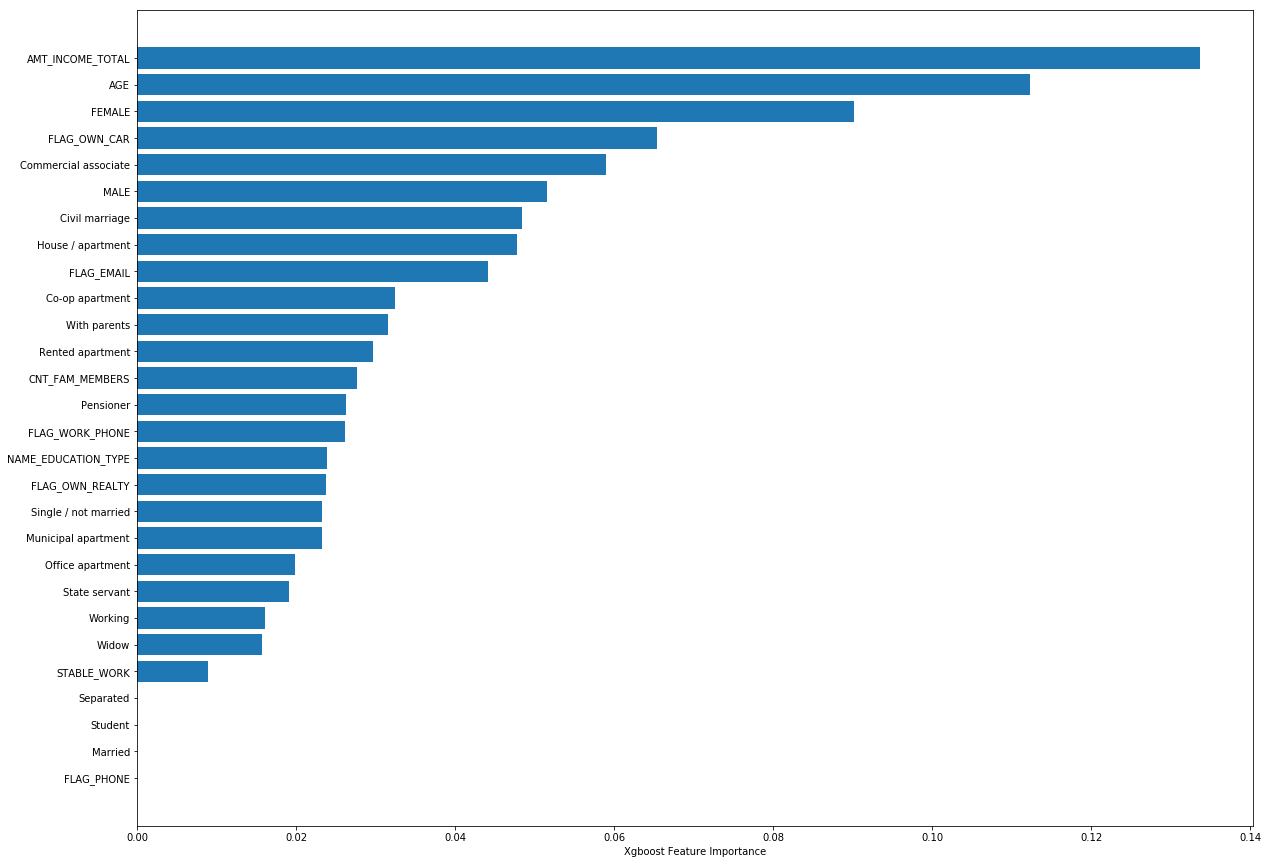

In [ ]:
plt.figure(figsize=(20, 15))
feature_names = np.array(features)
sorted_idx = xgbc_gs.best_estimator_.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], xgbc_gs.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

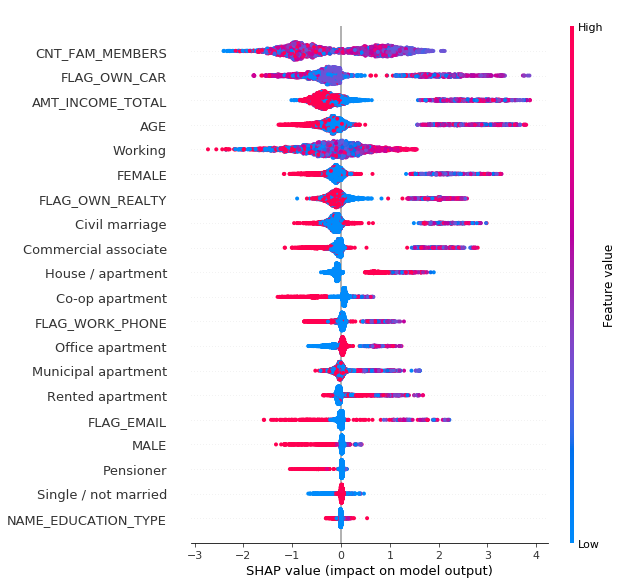

In [ ]:
explainer = shap.TreeExplainer(xgbc_gs.best_estimator_)
shap_values = explainer(x_test_bal)
shap.summary_plot(shap_values, feature_names = np.array(features), max_display=None)

В результате можно выдвинуть следующие гипотезы:
- Чем выше уровень дохода, тем выше прогноз того, что этот клиент "хороший".
- Чем старше клиент, тем выше вероятность того, что он будет хорошим клиентом.
- Указание почты повышает вероятность принадлежности к классу "хороший" клиент.
- Среди женщин больше тех, кто может принадлежать к "плохому" клиенту, но это может быть вызвано несбалансированностью изначальной выборки (женщин было больше).
- Семейный статус влияет на результат неоднозначно: среди семейных и одиноких людей много и тех, кто относится к "плохим", и к "хорошим" клиентам.
- Наличие высшего образования так же неоднозначно влияет на результат.
